given following packages
---
- `gdal` `2.4.4`
- `rasterio` `1.1.5`
- `rioxarray` `0.1.1`
- `proj 7.0.0`
- `pyproj 2.6.1.post1`
- `netcdf4` `1.5.3`

In [1]:
import numpy as np
import rioxarray as rio
import xarray

In [2]:
# load KNMI radar data
filename_h5 = 'RAD_NL25_PCP_NA_201910281900.h5'

# Filename tif reprojected to RD
filename_rd = 'RAD_NL25_PCP_NA_201910281900_rd_riox.tif'

In [3]:
# define x and y values
# !! based on center coordinates of cells
xs = np.mgrid[0.5:700.5:1]
ys = np.mgrid[-3650.5:-3650.5-765:-1]

In [4]:
# proj defintions
proj4_rad = '+proj=stere +x_0=0 +y_0=0 +lat_0=90 +lon_0=0 +lat_ts=60 +a=6378.137 +b=6356.752 +units=m'
proj4_rd = '+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs +<>'

In [5]:
# open raw radar data
xds = xarray.open_dataset(filename_h5, group='/image1', )
xds = xds.rename_dims({'phony_dim_0':'y', 'phony_dim_1':'x'})
xds = xds.assign_coords({'y':ys,'x' :xs})

# assign current projection and reproject
xds = xds.rio.write_crs(rio.crs.CRS.from_proj4(proj4_rad))
xds_rd = xds.rio.reproject(proj4_rd)

# write to tif
xds_rd.rio.to_raster(filename_rd)

In [6]:
!gdalinfo RAD_NL25_PCP_NA_201910281900_rd_riox.tif

Driver: GTiff/GeoTIFF
Files: RAD_NL25_PCP_NA_201910281900_rd_riox.tif
Size is 768, 826
Coordinate System is:
PROJCS["unknown",
    GEOGCS["unknown",
        DATUM["Unknown_based_on_Bessel_1841_ellipsoid",
            SPHEROID["Bessel 1841",6377397.155,299.1528128]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Oblique_Stereographic"],
    PARAMETER["latitude_of_origin",52.1561605555556],
    PARAMETER["central_meridian",5.38763888888889],
    PARAMETER["scale_factor",0.9999079],
    PARAMETER["false_easting",155000],
    PARAMETER["false_northing",463000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-236275.402756847790442,900792.860893698176369)
Pixel Size = (961.025429589943087,-961.025429589943087)
Metadata:
  AREA_OR_POINT=Area
  grid_mapping=spatial_ref
  image_bytes_per_pixel=1
  image_geo_parameter=REFLECTIVITY_[DBZ]
  image_product_name=RAD_NL25_PCP_H1.5_NA
  image_size=535500
Image Structure Metadata:
  INTERLE

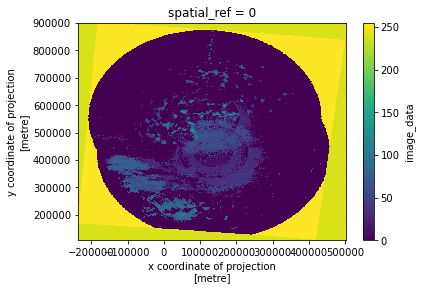

In [7]:
# quickplot shows result in RD projection
%matplotlib inline
xds_rd.image_data.plot()